<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

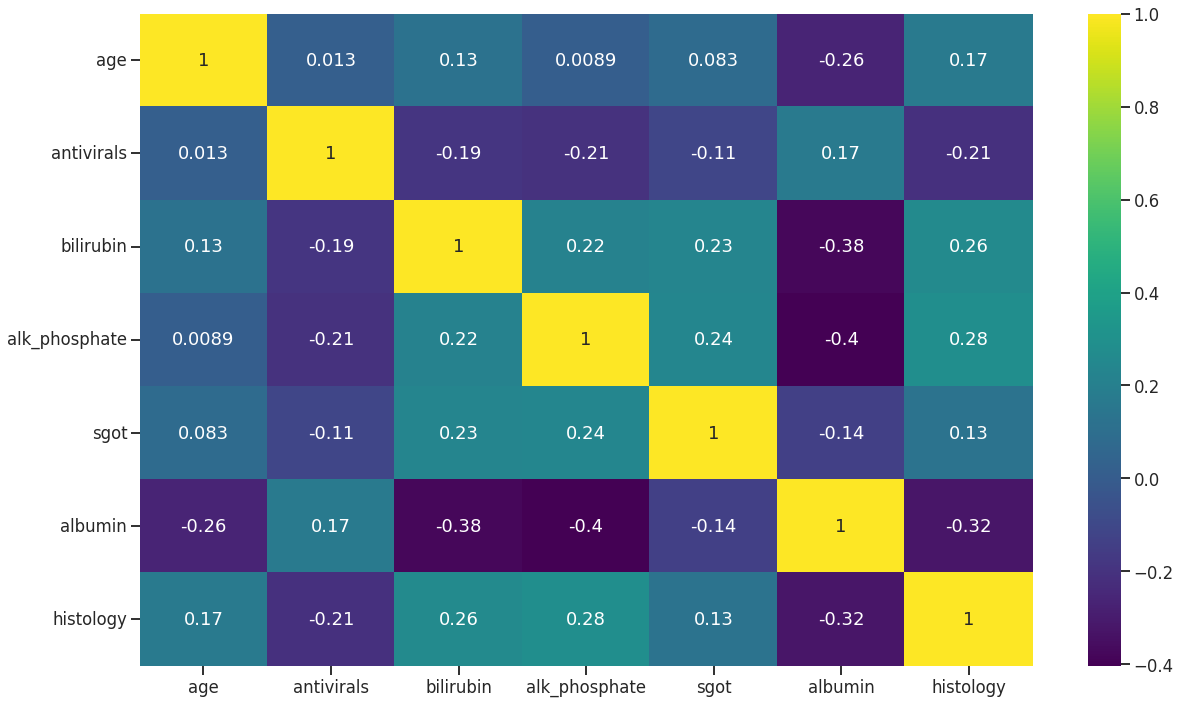

<Figure size 1440x720 with 0 Axes>

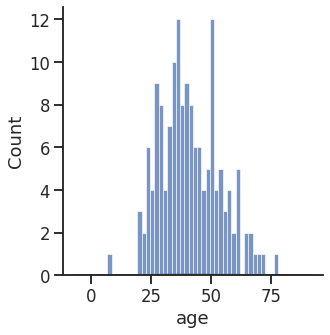

<Figure size 1440x720 with 0 Axes>

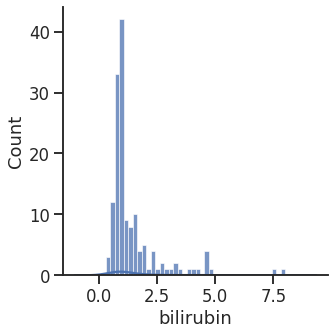

<Figure size 1440x720 with 0 Axes>

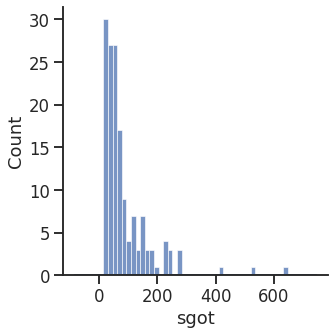

<Figure size 1440x720 with 0 Axes>

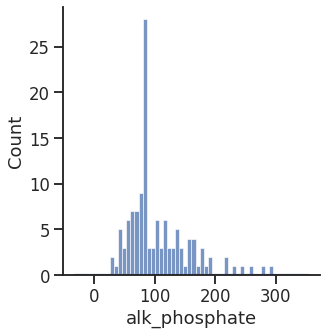

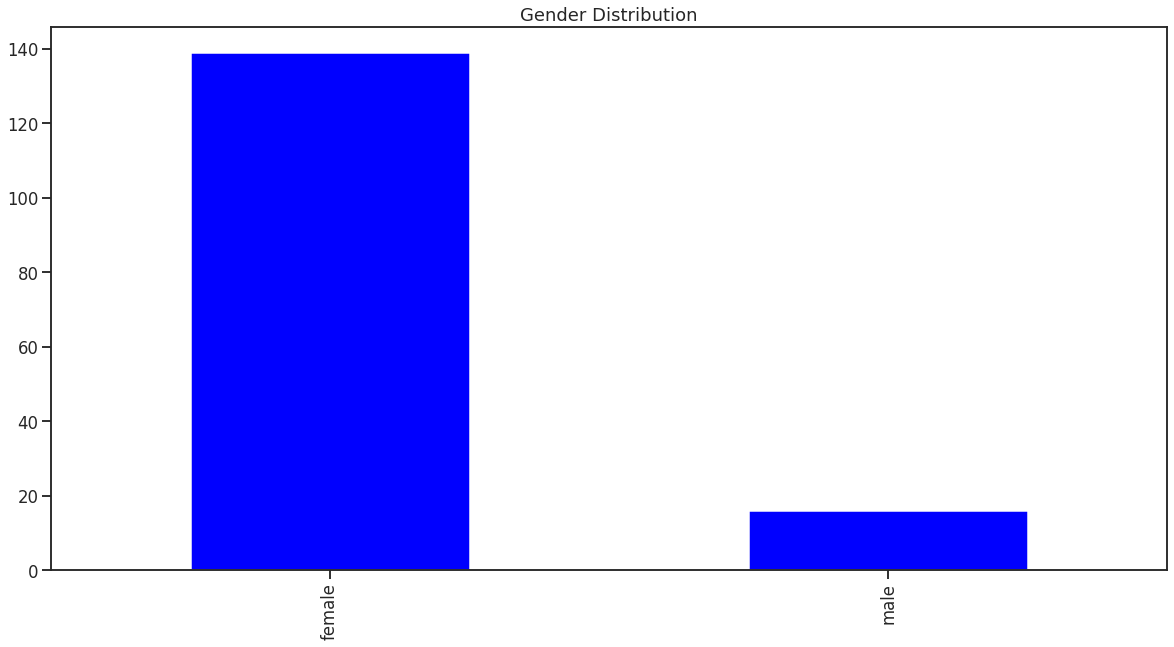

In [22]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
df = pd.read_csv("hepatitis_csv.csv")
df.head()
df.columns
df.shape
df.info()
df.describe()
df.isnull().sum()
df.drop("protime", axis = 1, inplace=True)
df.shape
numeric_data = df._get_numeric_data()
numeric_data.head()
numeric_data.drop('antivirals', axis=1, inplace=True)
numeric_data.drop('histology', axis=1, inplace=True)
numeric_data.info()
sns.set(style = "ticks", context = "talk")
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
x = list(df.corr().columns)
y = list(df.corr().index)
values = np.array(df.corr().values)
fig = go.Figure(data=go.Heatmap(
    x = x,
    y = y,
    z = values,
    hoverongaps = False
))
fig.show()
plt.figure(figsize=(20, 10))
sns.displot(df.age, bins=40)
sns.kdeplot(df.age)
px.histogram(df.age)
plt.figure(figsize=(20, 10))
sns.displot(df.bilirubin, bins=40)
sns.kdeplot(df.bilirubin)
px.histogram(df.bilirubin)
plt.figure(figsize=(20, 10))
sns.displot(df.sgot, bins=40)
sns.kdeplot(df.sgot)
px.histogram(df.sgot)
plt.figure(figsize=(20, 10))
sns.displot(df.alk_phosphate, bins=40)
sns.kdeplot(df.alk_phosphate)
px.histogram(df.alk_phosphate)
plt.figure(figsize=(20, 10))
df['sex'].value_counts().plot(kind="bar", color='blue', title='Gender Distribution')
px.pie(df['sex'], labels = df['sex'].value_counts().index,
       values = df['sex'].value_counts().values,
       names = df['sex'].value_counts().index,
       title = 'Gender Distribution in the Data'
      )
df['class'].value_counts()
px.histogram(df['class'])
px.pie(df['class'], labels = df['class'].value_counts().index,
       values = df['class'].value_counts().values,
       names = df['class'].value_counts().index,
       title = 'Distribution of Deaths vs Alive in the Data'
      )
from plotly.subplots import make_subplots
features = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'histology', 'class']
rows = 3
cols = 5
fig = make_subplots(rows=rows, cols=cols, subplot_titles=features)
x, y = np.meshgrid(np.arange(rows)+1, np.arange(cols)+1)
count  = 0

    
fig.update_layout(height=900, width=900, title_text='Boxplot Distribution', showlegend=False)
fig.show()
box_cols = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'histology', 'class']
rows = 3
cols = 5
fig = make_subplots(rows=rows, cols=cols, subplot_titles=box_cols)
x, y = np.meshgrid(np.arange(rows)+1, np.arange(cols)+1)
count = 0
for row, col in zip(x.T.reshape(-1), y.T.reshape(-1)):
    try:
        fig.add_trace(
            go.Box(x = df[box_cols[count]].values, name=''),
            row = row,
            col = col
        )
        count+=1
    except:
        break
    
fig.update_layout(height=900, width=900, title_text='Boxplot Distribution', showlegend=False)
fig.show()